## Import Module

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Read file 

In [4]:
#read the excel file using pandas
df = pd.read_excel(r"D:/Data Science/Projects/My Projects/Project 5/Copper_Set.xlsx")

In [5]:
#check the heading 
df.head(5)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


## find outliers - box plot & skewed data - hist plot and violin plot

In [6]:
# find outliers - box plot & skewed data - hist plot and violin plot
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

In [7]:
print(len(df['item_date'].unique()))
print(len(df['quantity tons'].unique()))
print(len(df['customer'].unique()))
print(len(df['country'].unique()))
print(len(df['status'].unique()))
print(len(df['item type'].unique()))
print(len(df['application'].unique()))
print(len(df['width'].unique()))
print(len(df['thickness'].unique()))
print(len(df['material_ref'].unique()))
print(len(df['product_ref'].unique()))
print(len(df['delivery date'].unique()))
print(len(df['selling_price'].unique()))

253
181673
1170
18
10
7
31
1386
595
16564
33
29
9796


In [8]:
#getting the shape of dataframe
df.shape

(181673, 14)

In [9]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [11]:
df['item_date']

0         20210401.0
1         20210401.0
2         20210401.0
3         20210401.0
4         20210401.0
             ...    
181668    20200702.0
181669    20200702.0
181670    20200702.0
181671    20200702.0
181672    20200702.0
Name: item_date, Length: 181673, dtype: float64

Data converstion

In [12]:
#convert 'item_date' column to string into datetime format 
df['item_date'] = pd.to_datetime(df['item_date'],format='%Y%m%d',errors='coerce').dt.date
df['item_date']

0         2021-04-01
1         2021-04-01
2         2021-04-01
3         2021-04-01
4         2021-04-01
             ...    
181668    2020-07-02
181669    2020-07-02
181670    2020-07-02
181671    2020-07-02
181672    2020-07-02
Name: item_date, Length: 181673, dtype: object

In [13]:
df['quantity tons']

0          54.151139
1         768.024839
2         386.127949
3         202.411065
4         785.526262
             ...    
181668    102.482422
181669    208.086469
181670      4.235594
181671         -2000
181672    406.686538
Name: quantity tons, Length: 181673, dtype: object

In [14]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'],errors='coerce')
df['quantity tons']

0           54.151139
1          768.024839
2          386.127949
3          202.411065
4          785.526262
             ...     
181668     102.482422
181669     208.086469
181670       4.235594
181671   -2000.000000
181672     406.686538
Name: quantity tons, Length: 181673, dtype: float64

In [15]:
df['customer']

0         30156308.0
1         30202938.0
2         30153963.0
3         30349574.0
4         30211560.0
             ...    
181668    30200854.0
181669    30200854.0
181670    30200854.0
181671    30200854.0
181672    30200854.0
Name: customer, Length: 181673, dtype: float64

In [16]:
df['customer'] = pd.to_numeric(df['customer'],errors='coerce')
df['customer']

0         30156308.0
1         30202938.0
2         30153963.0
3         30349574.0
4         30211560.0
             ...    
181668    30200854.0
181669    30200854.0
181670    30200854.0
181671    30200854.0
181672    30200854.0
Name: customer, Length: 181673, dtype: float64

In [17]:
df['country']

0         28.0
1         25.0
2         30.0
3         32.0
4         28.0
          ... 
181668    25.0
181669    25.0
181670    25.0
181671    25.0
181672    25.0
Name: country, Length: 181673, dtype: float64

In [18]:
df['country'] = pd.to_numeric(df['country'],errors='coerce')
df['country']

0         28.0
1         25.0
2         30.0
3         32.0
4         28.0
          ... 
181668    25.0
181669    25.0
181670    25.0
181671    25.0
181672    25.0
Name: country, Length: 181673, dtype: float64

In [19]:
df.head(0)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price


In [20]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable', nan], dtype=object)

In [21]:
df['status'] = df['status'].astype('category')
df['status']

0         Won
1         Won
2         Won
3         Won
4         Won
         ... 
181668    Won
181669    Won
181670    Won
181671    Won
181672    Won
Name: status, Length: 181673, dtype: category
Categories (9, object): ['Draft', 'Lost', 'Not lost for AM', 'Offerable', ..., 'Revised', 'To be approved', 'Won', 'Wonderful']

In [22]:
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [23]:
df['item type'] = df['item type'].astype('category')
df['item type']

0          W
1          W
2         WI
3          S
4          W
          ..
181668     W
181669     W
181670     W
181671     W
181672     W
Name: item type, Length: 181673, dtype: category
Categories (7, object): ['IPL', 'Others', 'PL', 'S', 'SLAWR', 'W', 'WI']

In [24]:
df['application'].unique()

array([10., 41., 28., 59., 15.,  4., 38., 56., 42., 26., 27., 19., 20.,
       66., 29., 22., 40., 25., 67., 79.,  3., 99.,  2.,  5., 39., 69.,
       70., 65., 58., 68., nan])

In [25]:
df['application'] = pd.to_numeric(df['application'], errors= 'coerce')
df['application']

0         10.0
1         41.0
2         28.0
3         59.0
4         10.0
          ... 
181668    41.0
181669    41.0
181670    41.0
181671    41.0
181672    41.0
Name: application, Length: 181673, dtype: float64

In [26]:
df['thickness'].unique()

array([2.000e+00, 8.000e-01, 3.800e-01, 2.300e+00, 4.000e+00, 1.500e+00,
       6.800e-01, 6.000e-01, 5.500e-01, 7.500e-01, 3.700e-01, 5.950e-01,
       4.500e-01, 2.500e+00, 1.040e+00, 1.000e+00, 3.000e+00, 5.000e+00,
       5.000e-01, 2.500e+03, 1.100e+00, 7.200e-01, 1.250e+00, 1.800e+00,
       1.260e+00, 1.300e+00, 1.300e+01, 1.160e+00, 7.000e-01, 1.400e+00,
       9.000e-01, 6.350e+00, 2.400e+00, 7.000e+00, 1.000e+01, 1.900e+00,
       1.200e+01, 1.500e+01, 1.700e+00, 2.420e+00, 8.000e+00, 1.200e+00,
       1.920e+00, 3.200e-01, 1.750e+00, 1.600e+00, 1.150e+00, 3.200e+00,
       3.500e+00, 9.990e+00, 1.199e+01, 1.050e+00, 6.000e+00, 4.000e-01,
       5.700e-01, 4.700e-01, 2.250e+00, 2.750e+00, 1.800e-01, 8.500e-01,
       4.500e+00, 4.250e+00, 9.700e-01, 3.250e+00, 3.750e+00, 5.600e-01,
       2.900e+00, 3.800e+00, 2.200e+00, 2.600e+00, 3.700e+00, 6.300e-01,
       1.900e-01, 4.900e+00, 8.800e-01, 1.120e+00, 1.450e+00, 2.800e+00,
       1.060e+00, 1.860e+00, 3.300e+00, 3.510e+00, 

In [27]:
df['thickness'] = pd.to_numeric(df['thickness'], errors= 'coerce')
df['thickness']

0         2.00
1         0.80
2         0.38
3         2.30
4         4.00
          ... 
181668    0.96
181669    0.95
181670    0.71
181671    0.85
181672    0.71
Name: thickness, Length: 181673, dtype: float64

In [28]:
df['width'].unique()

array([1500., 1210.,  952., ..., 1831., 1741., 1786.])

In [29]:
df['width'] = pd.to_numeric(df['width'], errors= 'coerce')
df['width']

0         1500.0
1         1210.0
2          952.0
3         1317.0
4         2000.0
           ...  
181668    1220.0
181669    1500.0
181670    1250.0
181671    1250.0
181672    1240.0
Name: width, Length: 181673, dtype: float64

In [30]:
df['material_ref'].unique()

array(['DEQ1 S460MC', '0000000000000000000000000000000000104991',
       'S0380700', ..., 'MAS65550', '4.11043_1060X5_BRE',
       '202006170005.IO.1.1'], dtype=object)

In [31]:
df['material_ref'] = df['material_ref'].str.strip('0') #lstrip
df['material_ref']

0                     DEQ1 S460MC
1                          104991
2                          S03807
3         DX51D+ZM310MAO 2.3X1317
4                 2_S275JR+AR-CL1
                   ...           
181668                    1000777
181669                    1000227
181670                    1004216
181671                    1001149
181672                    1005439
Name: material_ref, Length: 181673, dtype: object

In [32]:
df['product_ref'].unique()

array([1670798778, 1668701718,     628377,     640665,     611993,
       1668701376,  164141591, 1671863738, 1332077137,     640405,
       1693867550, 1665572374, 1282007633, 1668701698,     628117,
       1690738206,     628112,     640400, 1671876026,  164336407,
        164337175, 1668701725, 1665572032,     611728, 1721130331,
       1693867563,     611733, 1690738219, 1722207579,  929423819,
       1665584320, 1665584662, 1665584642], dtype=int64)

In [33]:
df['product_ref'] = pd.to_numeric(df['product_ref'], errors= 'coerce')
df['product_ref']

0         1670798778
1         1668701718
2             628377
3         1668701718
4             640665
             ...    
181668     164141591
181669     164141591
181670     164141591
181671     164141591
181672     164141591
Name: product_ref, Length: 181673, dtype: int64

In [34]:
df['delivery date'].unique()

array([20210701., 20210401., 20210101., 20210301., 20210601., 20210501.,
       20210801., 30310101., 20210901., 20211001., 20211101., 20220101.,
       20200701., 20201001., 20200101., 20210201., 20211201., 20190701.,
       20200801., 20201101., 20201201., 20190401., 20200601., 20200401.,
       20200901., 20200501.,       nan, 20212222., 20191001.])

In [35]:
df['delivery date'] = pd.to_datetime(df['delivery date'],format='%Y%m%d', errors = 'coerce').dt.date
df['delivery date']

0         2021-07-01
1         2021-04-01
2         2021-01-01
3         2021-01-01
4         2021-03-01
             ...    
181668    2020-07-01
181669    2020-07-01
181670    2020-07-01
181671    2020-07-01
181672    2020-07-01
Name: delivery date, Length: 181673, dtype: object

In [36]:
df['selling_price'].unique()

array([ 854.  , 1047.  ,  644.33, ...,  619.81,  628.52,  615.81])

In [37]:
df['selling_price'] = pd.to_numeric(df['selling_price'], errors= 'coerce')
df['selling_price']

0          854.00
1         1047.00
2          644.33
3          768.00
4          577.00
           ...   
181668     591.00
181669     589.00
181670     619.00
181671     601.00
181672     607.00
Name: selling_price, Length: 181673, dtype: float64

In [38]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [39]:
df.shape

(181673, 14)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   id             181671 non-null  object  
 1   item_date      181670 non-null  object  
 2   quantity tons  181672 non-null  float64 
 3   customer       181672 non-null  float64 
 4   country        181645 non-null  float64 
 5   status         181671 non-null  category
 6   item type      181673 non-null  category
 7   application    181649 non-null  float64 
 8   thickness      181672 non-null  float64 
 9   width          181673 non-null  float64 
 10  material_ref   103754 non-null  object  
 11  product_ref    181673 non-null  int64   
 12  delivery date  181670 non-null  object  
 13  selling_price  181672 non-null  float64 
dtypes: category(2), float64(7), int64(1), object(4)
memory usage: 17.0+ MB


Remove null value

In [41]:
df['material_ref'].unique()

array(['DEQ1 S460MC', '104991', 'S03807', ..., 'MAS6555',
       '4.11043_1060X5_BRE', '202006170005.IO.1.1'], dtype=object)

In [42]:
df['material_ref'].fillna('unknown',inplace = True)
df['material_ref']

0                     DEQ1 S460MC
1                          104991
2                          S03807
3         DX51D+ZM310MAO 2.3X1317
4                 2_S275JR+AR-CL1
                   ...           
181668                    1000777
181669                    1000227
181670                    1004216
181671                    1001149
181672                    1005439
Name: material_ref, Length: 181673, dtype: object

In [43]:
df = df.dropna()

In [44]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [45]:
df.shape

(181631, 14)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181631 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   id             181631 non-null  object  
 1   item_date      181631 non-null  object  
 2   quantity tons  181631 non-null  float64 
 3   customer       181631 non-null  float64 
 4   country        181631 non-null  float64 
 5   status         181631 non-null  category
 6   item type      181631 non-null  category
 7   application    181631 non-null  float64 
 8   thickness      181631 non-null  float64 
 9   width          181631 non-null  float64 
 10  material_ref   181631 non-null  object  
 11  product_ref    181631 non-null  int64   
 12  delivery date  181631 non-null  object  
 13  selling_price  181631 non-null  float64 
dtypes: category(2), float64(7), int64(1), object(4)
memory usage: 18.4+ MB


In [47]:
df['item_date'] = pd.to_datetime(df['item_date'],format='%Y%m%d',errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'],errors='coerce')
df['customer'] = pd.to_numeric(df['customer'],errors='coerce')
df['country'] = pd.to_numeric(df['country'],errors='coerce')
df['status'] = df['status'].astype('category')
df['item type'] = df['item type'].astype('category')
df['application'] = pd.to_numeric(df['application'], errors= 'coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors= 'coerce')
df['width'] = pd.to_numeric(df['width'], errors= 'coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors= 'coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'],format='%Y%m%d', errors = 'coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors= 'coerce')

In [48]:
# material_ref has large set of null values, so replacing them with unknown
df['material_ref'].fillna('unknown', inplace=True)

In [49]:

# deleting the remaining null values as they are less than 1% of data which can be neglected
df = df.dropna()
missing_values_count = df.isnull().sum()
print(missing_values_count)
print(df.shape)

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64
(181631, 14)


In [50]:
dfc= df.copy()

In [51]:
dfc['quantity tons']   # skewed
dfc['country']
dfc['application']
dfc['thickness']       # skewed
dfc['width']
dfc['selling_price']   # skewed

0          854.00
1         1047.00
2          644.33
3          768.00
4          577.00
           ...   
181668     591.00
181669     589.00
181670     619.00
181671     601.00
181672     607.00
Name: selling_price, Length: 181631, dtype: float64

In [52]:
# find outliers - box plot & skewed data - hist plot and violin plot

def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

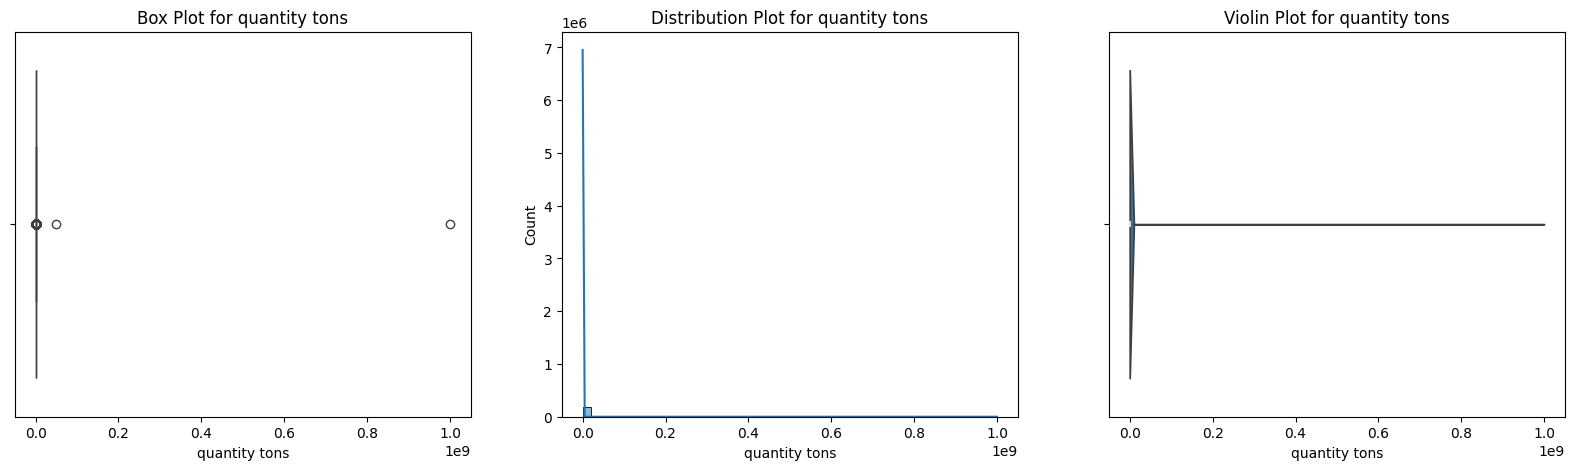

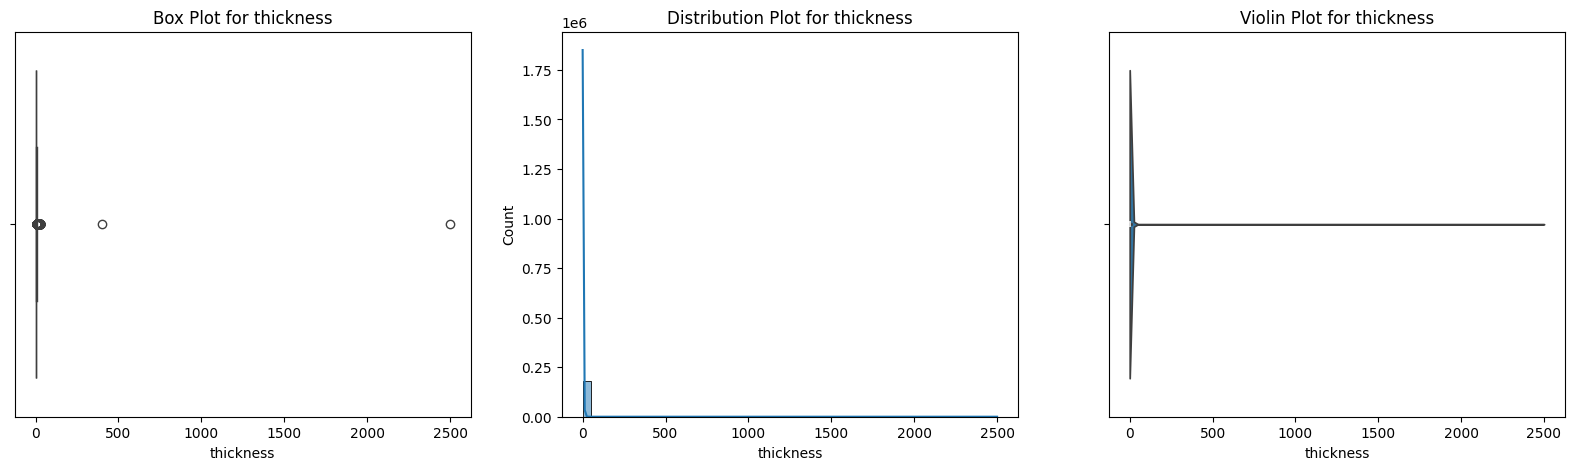

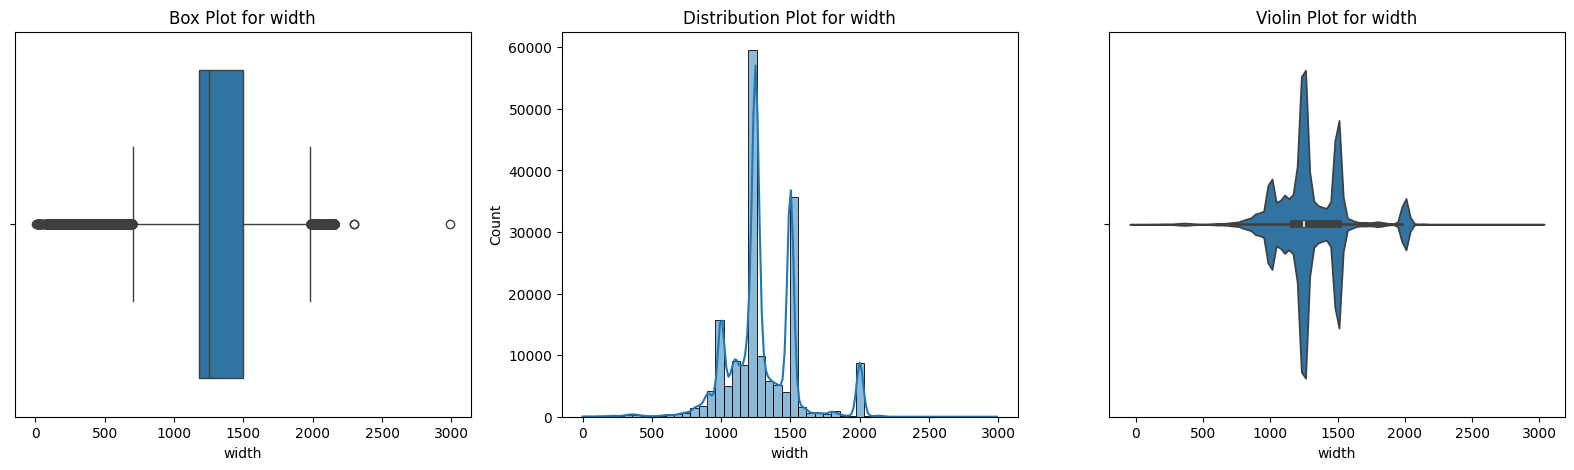

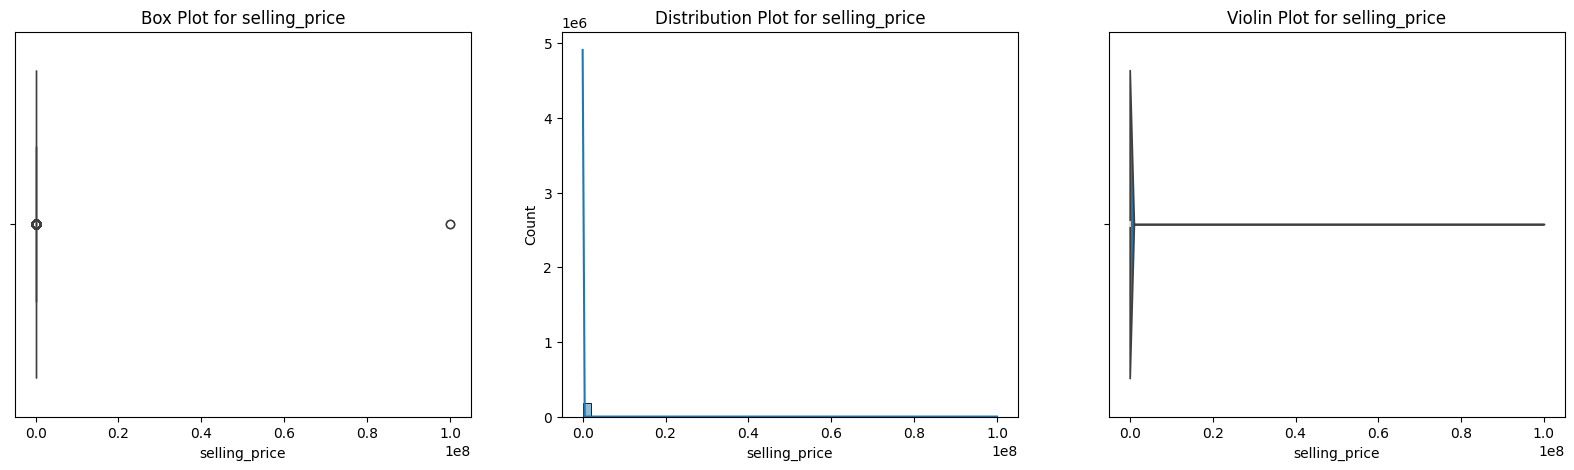

In [53]:
for i in ['quantity tons', 'thickness', 'width', 'selling_price']:
    plot(dfc, i)

In [54]:
mask1 = dfc['selling_price'] <= 0
print(mask1.sum())
dfc.loc[mask1, 'selling_price'] = np.nan

mask1 = dfc['quantity tons'] <= 0
print(mask1.sum())
dfc.loc[mask1, 'quantity tons'] = np.nan

mask1 = dfc['thickness'] <= 0
print(mask1.sum())

7
4
0


In [55]:
dfc.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [56]:
dfc.dropna(inplace=True)
len(dfc)

181620

In [57]:
dfc['selling_price_log'] = np.log(dfc['selling_price'])

dfc['quantity tons_log'] = np.log(dfc['quantity tons'])

dfc['thickness_log'] = np.log(dfc['thickness'])

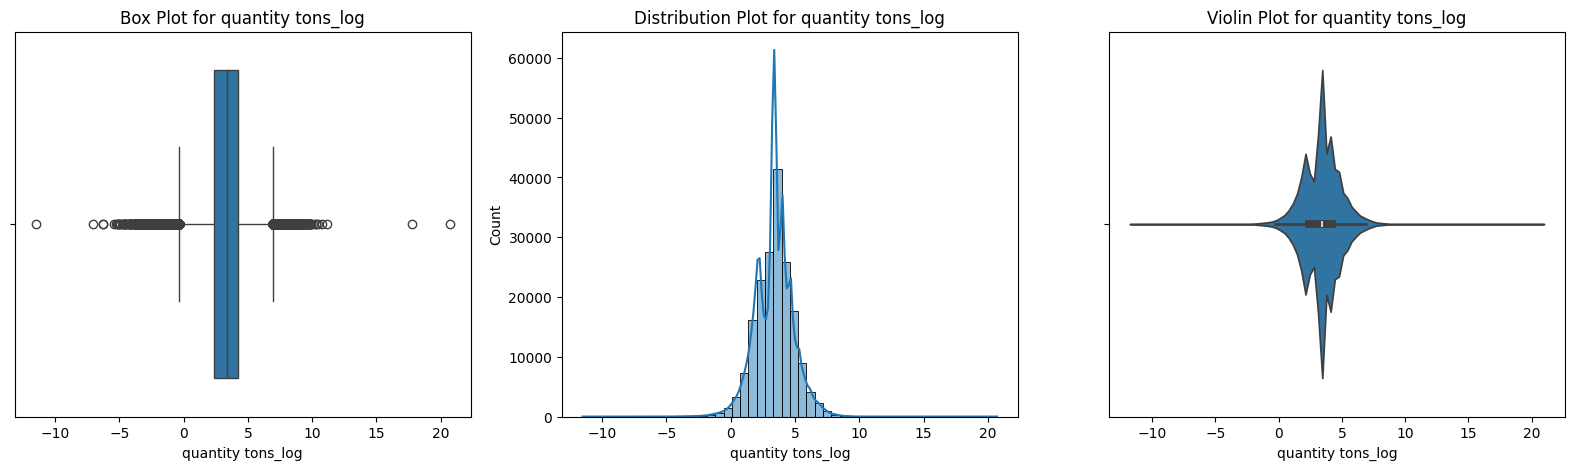

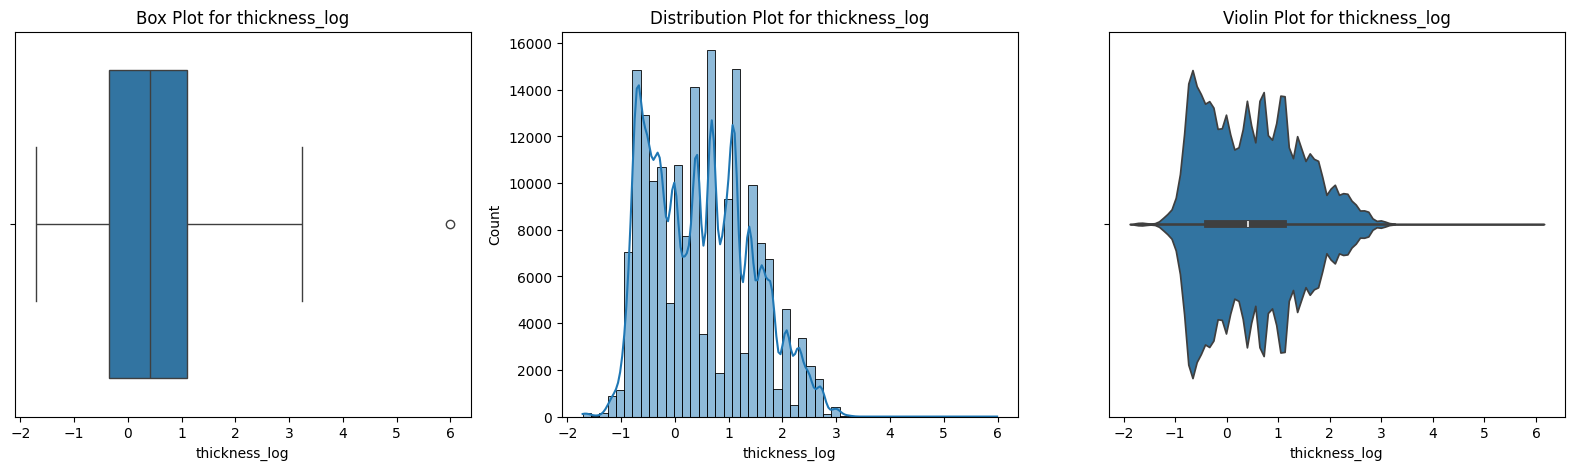

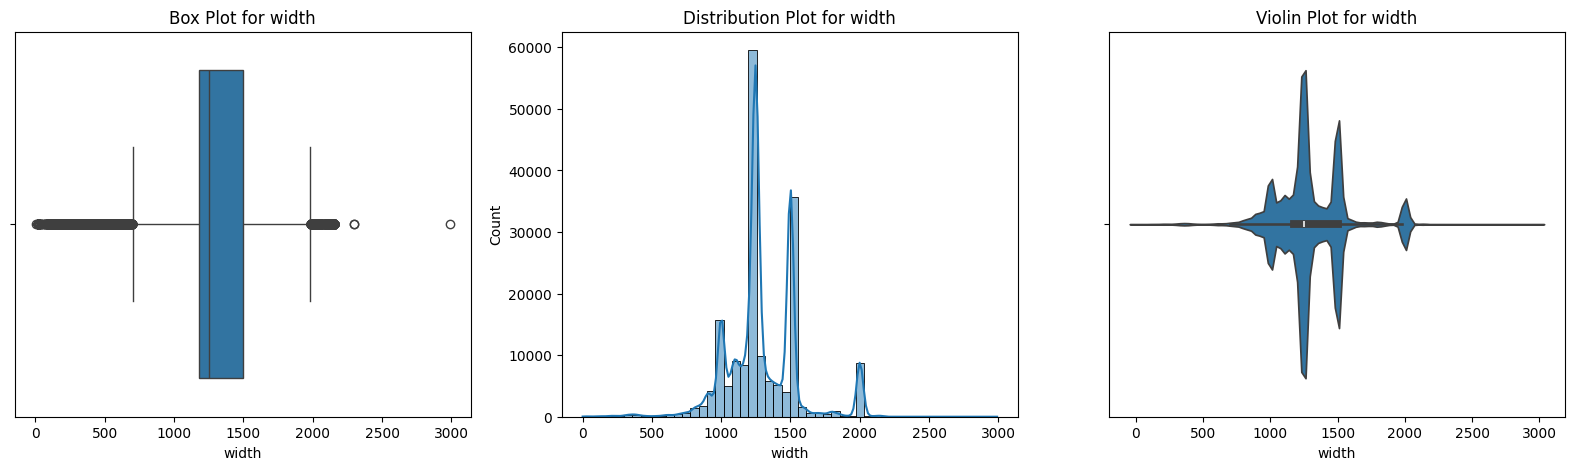

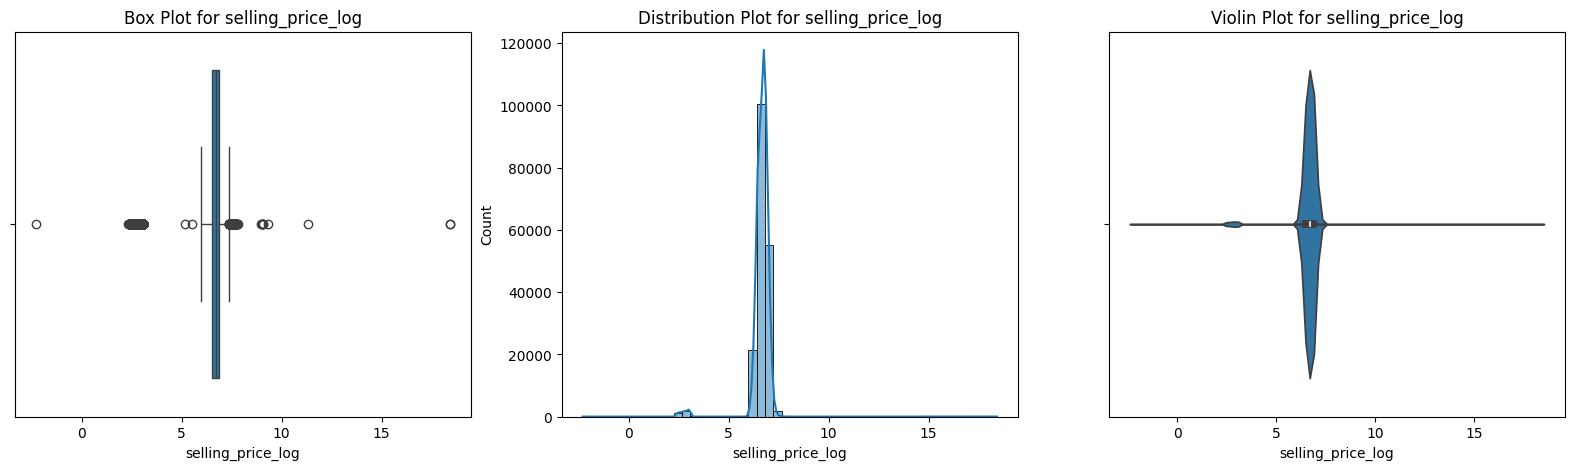

In [58]:
for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(dfc, i)

In [59]:
dfc.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S03807,628377,2021-01-01,644.33,6.468211,5.956169,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,6.643790,5.310301,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.357842,6.666354,1.386294


In [60]:
dfc.head(0)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log


In [61]:
x=dfc[['application','thickness_log','width','selling_price_log','quantity tons_log','country','customer','product_ref']].corr()

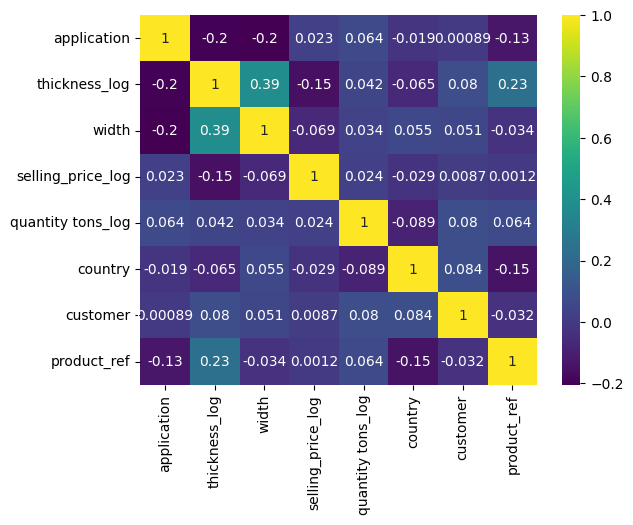

In [62]:
sns.heatmap(x, annot=True, cmap="viridis")
plt.show()

In [63]:
dfc.head(0)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [70]:
category_col=['status', 'item type']
encoder= LabelEncoder()
for i in category_col:
    print(i)
    dfc[i] = encoder.fit_transform(dfc[i])
    print(dfc[i].unique())

status
[7 0 6 1 2 8 5 4 3]
item type
[5 6 3 1 2 0 4]


In [71]:
X = dfc[['quantity tons_log','thickness_log','width','country','status','item type', 'application','product_ref']].values
y = dfc[['selling_price_log']].values

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Create an instance of each regression model
et_model = ExtraTreesRegressor()
xgb_model = XGBRegressor()
dt_model = DecisionTreeRegressor()

# Train the models
et_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
et_preds = et_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
dt_preds = dt_model.predict(X_test)

# Evaluate the models

et_mse = mean_squared_error(y_test, et_preds)
et_mae = mean_absolute_error(y_test, et_preds)
et_r2 = r2_score(y_test, et_preds)

xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

dt_mse = mean_squared_error(y_test, dt_preds)
dt_mae = mean_absolute_error(y_test, dt_preds)
dt_r2 = r2_score(y_test, dt_preds)

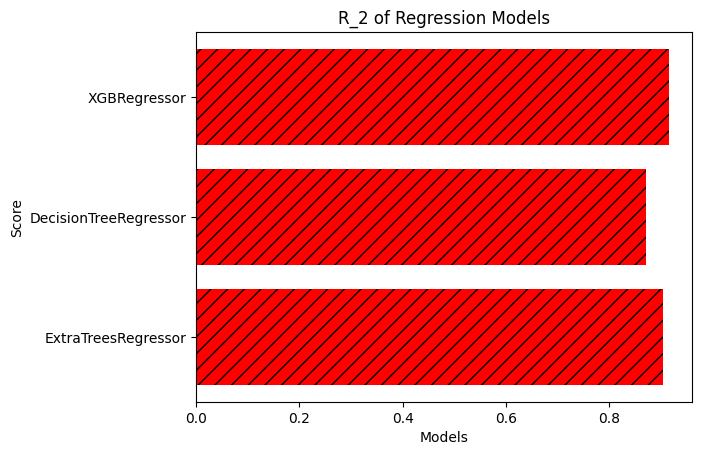

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

ExtraTreesRegressor 0.903514199614515
DecisionTreeRegressor 0.8710956548639213
XGBRegressor 0.9150005229282228

Model: XGBRegressor contain Maximum R2_Score: 0.9150005229282228 


In [73]:
models = ['ExtraTreesRegressor', 'DecisionTreeRegressor', 'XGBRegressor']
score = [et_r2, dt_r2, xgb_r2]

plt.barh(models, score, color='red',hatch='//')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('R_2 of Regression Models')
plt.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

X = dfc[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y = dfc[['selling_price_log']]

OHE = OneHotEncoder(handle_unknown='ignore')
OHE.fit(X[['status']])
X_OHE = OHE.fit_transform(X[['status']]).toarray()

OHE2 = OneHotEncoder(handle_unknown='ignore')
OHE2.fit(X[['item type']])
X_OHE2 = OHE2.fit_transform(X[['item type']]).toarray()

X = np.concatenate((X[['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_OHE, X_OHE2), axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1, random_state=42)

dtr = DecisionTreeRegressor()

param_grid = {'max_depth': [2,5,10,20],
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,2,4],
              'max_features':['sqrt', 'log2', None]}
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv = 5)
grid_search.fit(X_train,y_train)
print('Best hyperparameters:', grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean squared error: 0.022974998291317782
R-squared: 0.9286869481756651


In [ ]:
new_sample = np.array([[np.log(40),10 ,np.log(230), 0,24, 30202938,1670798778,'PL','Won']])
new_sample_ohe = OHE.transform(new_sample[:,[7]]).toarray()
new_sample_be = OHE2.transform(new_sample[:,[8]]).toarray()
new_sample = np.concatenate((new_sample[:,[0,1,2,3,4,5,6,]],new_sample_ohe,new_sample_be),axis = 1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predict selling price:', np.exp(new_pred))

Predict selling price: [671.89602227]


In [ ]:
import pickle
with open('model.pkl','wb') as file:
    pickle.dump(best_model,file)
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler, file)
with open('scaler_OHE.pkl','wb') as file:
    pickle.dump(OHE, file)
with open('scaler_OHE2.pkl','wb') as file:
    pickle.dump(OHE2,file)

In [ ]:
print(len(dfc))
dfc.head(2)

181620


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,104991,1668701718,2021-04-01,1047.0,6.953684,6.643822,-0.223144


In [ ]:
df_c = dfc[dfc['status'].isin(['Won','Lost'])]
len(df_c)

150427

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelBinarizer

Y = df_c['status']
X = df_c[['quantity tons_log','selling_price_log','item type','application','thickness_log','width','country','customer','product_ref']]

OHE = OneHotEncoder(handle_unknown='ignore')
OHE.fit(X[['item type']])
X_OHE = OHE.fit_transform(X[['item type']]).toarray()

be = LabelBinarizer()
be.fit(Y)
y = be.fit_transform(Y)

X = np.concatenate((X[['quantity tons_log','selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_OHE), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1, random_state=42)

dtc= DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Acc:{accuracy}')
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Acc:0.9145782091338164
Confusion Matrix:
[[ 2880   614]
 [  671 10878]]


confusion_matrix:
[[ 2880   614]
 [  671 10878]]
classification report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      3494
           1       0.95      0.94      0.94     11549

    accuracy                           0.91     15043
   macro avg       0.88      0.88      0.88     15043
weighted avg       0.92      0.91      0.91     15043



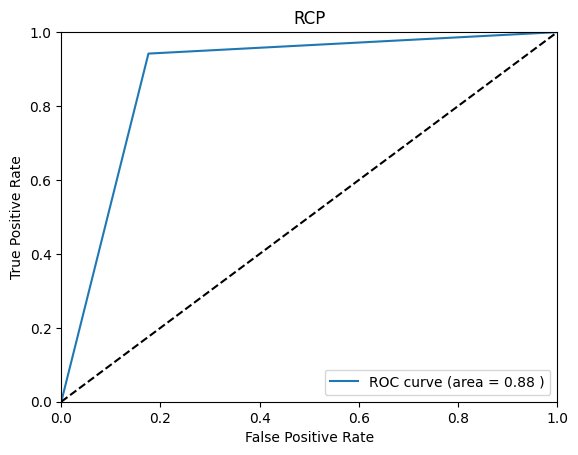

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,auc
import matplotlib.pyplot as plt

print('confusion_matrix:')
print(confusion_matrix(y_test, y_pred))
print('classification report:')
print(classification_report(y_test, y_pred))

#roc and auc cuvre
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
roc_curve = auc(fpr,tpr)
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f )' % roc_curve)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RCP')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Predict the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[np.log(700), np.log(944), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
new_sample_ohe = OHE.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Lost


In [ ]:
# Saving the model
import pickle
with open('clsmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(OHE, f)